In [1]:
import tensorflow as tf
import matplotlib as mpl

Model 1 Version 1 - General network with:
1 input layer,
1 flattened layer,
2 dense layers,
1 output layer

In [2]:
#Step 1 - Import the data
#Also split the data into training and test sets, also hold out the last 5000 images from training/testing
fashionMnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashionMnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[:-5000], y_train_full[:-5000]

#Step 2 - Create the neural net structure
#get_layer() and get_weights() to see layers and weight
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(300, activation="relu"))
model1.add(tf.keras.layers.Dense(100, activation="relu"))
model1.add(tf.keras.layers.Dense(10, activation="softmax"))

model1.summary()

#Step 3 - Compile the model
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

#Step 4 - Train and evaluate model
history1 = model1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

#Step 5 - Check for overfitting and retest if needed (STOP HERE BASED ON ASSIGNMENT REQS)
mse_test, rmse_test = model1.evaluate(X_test, y_test)

#Step 6 - Visualize the data (see code block below)

#Step 7 - Use model to make predictions
X_new = X_test[:3]
y_pred = model1.predict(X_new)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30


1719/1719 [==============================] - 4s 2ms/step - loss: 43984206027554816.0000 - accuracy: 0.0998 - val_loss: 2.3034 - val_accura

Test one with 30 epochs, learning rate of .01, and 3 layers one with 300 neurons, one with 100 neurons, and one with 10 neurons: loss is 2.3026/2.3027 and an accuracy between .0977 and .1016 which is really bad (loss should be closer to 0 and accuracy should be closer to 1). Below is a visual of the model (this proves that the model is currently not good)

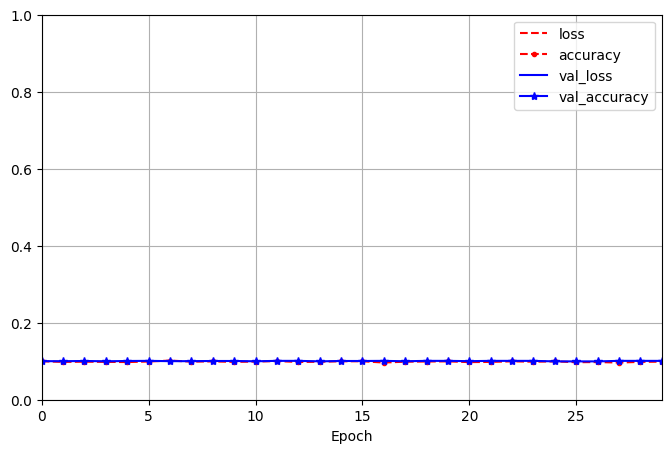

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

Model 1.2 - This is when I add a dropout layer and a normalization layer due to learning about them in class to help the model out. The final layers are 1 input, 1 flattened, 5 hidden, 1 batch normalization layer, and finally 1 output layer.

In [5]:
#Step 1 - Import the data
#Also split the data into training and test sets, also hold out the last 5000 images from training/testing
fashionMnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashionMnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[:-5000], y_train_full[:-5000]

#Step 2 - Create the neural net structure
#get_layer() and get_weights() to see layers and weight
tf.random.set_seed(42)
model1_2 = tf.keras.Sequential()
model1_2.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model1_2.add(tf.keras.layers.Flatten())
model1_2.add(tf.keras.layers.Dense(300, activation="relu"))
#dropout layer added to prevent overfitting
model1_2.add(tf.keras.layers.Dropout(.2))
#edited to 250 neurons to hopefully help with a more accurate model
model1_2.add(tf.keras.layers.Dense(250, activation="relu"))
#batch normalization layer added
model1_2.add(tf.keras.layers.BatchNormalization())
#adding 3 more hidden layers
model1_2.add(tf.keras.layers.Dense(200, activation="relu"))
model1_2.add(tf.keras.layers.Dense(150, activation="relu"))
model1_2.add(tf.keras.layers.Dense(50, activation="relu"))
model1_2.add(tf.keras.layers.Dense(10, activation="softmax"))

model1_2.summary()

#Step 3 - Compile the model
model1_2.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

#Step 4 - Train and evaluate model
history1_2 = model1_2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

#Step 5 - Check for overfitting and retest if needed (STOP HERE BASED ON ASSIGNMENT REQS)
mse_test, rmse_test = model1_2.evaluate(X_test, y_test)

#Step 6 - Visualize the data (see code block below)

#Step 7 - Use model to make predictions
X_new = X_test[:3]
y_pred = model1_2.predict(X_new)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_6 (Dense)             (None, 250)               75250     
                                                                 
 batch_normalization (Batch  (None, 250)               1000      
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 200)               50200     
                                                      

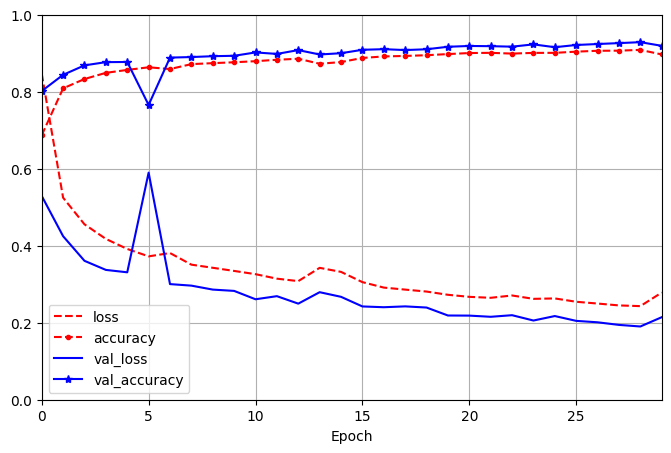

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history1_2.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

As we can see here the loss is around .2-.3 and the accuracy is .8-.9 which leads me to belive that my model is overfitting (especially from how the graph looks)